# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Vitor Satyro Vitturi</font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import *

In [2]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [3]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [4]:
df["Hemisfério"] = pd.cut(df.Latitude, bins=(-90,0,90), labels=["Sul","Norte"])
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisfério
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

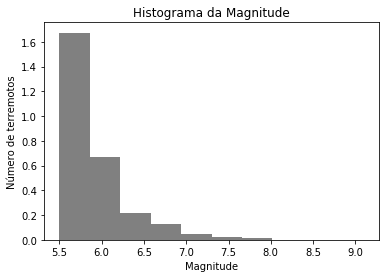

In [5]:
plt.hist(df.Magnitude, bins=10, color='grey', normed=True)
plt.title("Histograma da Magnitude")
plt.ylabel("Número de terremotos")
plt.xlabel("Magnitude")

**Análise do histograma**

Analisando o histograma, percebe-se que há mais terremotos com magnitudes menores, mostrando uma quase distribuição exponencial.

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [6]:
mu, sigma = expon.fit(df.Magnitude)
print("loc = {0}    scale = {1}" .format(mu,sigma))

loc = 5.499999999671081    scale = 0.3825486488509098


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

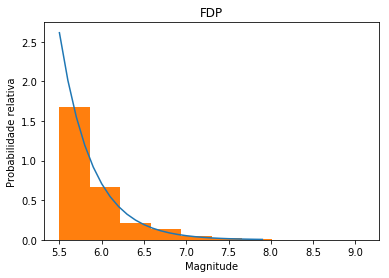

In [7]:
plt.plot(np.arange(5.5,8,0.1), expon.pdf(np.arange(5.5,8,0.1),loc=mu,scale=sigma))
plt.hist(df.Magnitude, normed=True)
plt.title("FDP")
plt.ylabel("Probabilidade relativa")
plt.xlabel("Magnitude")

#### Como o pdf retornaria uma função do -infinito pro +infinito precisamos limitar para x = [5.5,8], sendo x a Magnitude.

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [8]:
tabela = pd.crosstab(df["Hemisfério"], df.Type, normalize=True)
tabela

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisfério,,,,
Sul,0.545191,0.000085,0.001196,0.000043
Norte,0.447121,0.000085,0.006279,0.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [9]:
num_norte = len(df[(df["Hemisfério"]=="Norte")&(df["Type"]=="Earthquake")])
num_total = len(df[df["Type"]=="Earthquake"])

prob = num_norte/num_total
print(str(round(prob*100,2)) + "% de chance de ter terremoto no hemisfério norte")

45.06% de chance de ter terremoto no hemisfério norte


Explique o seu raciocínio

Para calcular a probabilidade de ocorrer terremoto no hemisfério norte, fiz a relação entre numero de terremotos no hemisfério norte por numero total de terremotos. Obtendo 45.35% de chance.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [10]:
num_norte = len(df[(df["Hemisfério"]=="Norte")])
num_nuclear = len(df[(df["Hemisfério"]=="Norte") & (df["Type"]=="Nuclear Explosion")])

print("Probabilidade de ser Nuclear Explosion, dado que aconteceu no Norte, é de {0}%".format(round(num_nuclear*100/num_norte, 2)))

Probabilidade de ser Nuclear Explosion, dado que aconteceu no Norte, é de 1.38%


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ... 

In [11]:
rate = df.groupby('Hemisfério').size().div(len(df))
df.groupby(['Type','Hemisfério']).size().div(len(df)).div(rate, axis=0, level="Hemisfério")


Type               Hemisfério
Earthquake         Sul           0.997577
                   Norte         0.985966
Explosion          Sul           0.000156
                   Norte         0.000188
Nuclear Explosion  Sul           0.002188
                   Norte         0.013846
Rock Burst         Sul           0.000078
dtype: float64

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

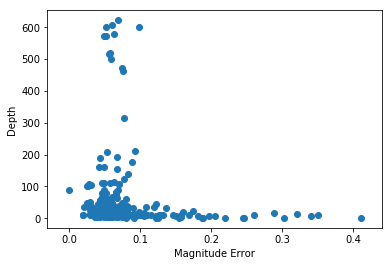

In [12]:
plt.scatter(df["Magnitude Error"], df.Depth)
plt.ylabel('Depth')
plt.xlabel('Magnitude Error')

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [13]:
cor_MagEr_Dep = df["Magnitude Error"].corr(df["Depth"])
cor_MagEr_Dep

-0.076918438923387206

Explique o que significa o valor da correlação calculada acima? 

O valor da correlação mostra que que as variáveis não são muito dependentes uma da outra, pois 0.07 é um valor longe de 1. O sinal nos mostra uma proporcionalidade negativa em relação as variáveis.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64



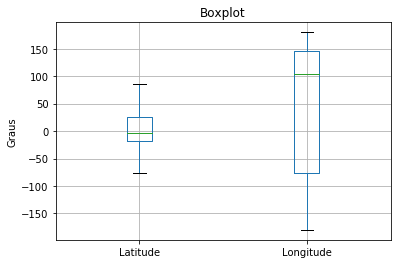

In [14]:
print(df.Latitude.describe())
print("")
print(df.Longitude.describe())
print("")
df2 = df[['Latitude','Longitude']]
plt.title("Boxplot")
plt.ylabel("Graus")
df2.boxplot()


**Explicando valores achados e boxplot**

O boxsplot nos mostra os Quartis e o range da Latitude e Longitude, igual ao describe, porém de maneira gráfica, dando maior visão para relacionar as variáveis entre si. 

Pode-se observar que dentro da latitude total só uma pequena parte está dentro de Q1 e Q3, revelando uma distribuição um pouco simétrica pela posiçao da caixa de acordo com o boxplot. Entretanto, a mediana se aproxima mais do primeiro Quartil.

Já na longitude, pode-se observar o tamanho maior da caixa, mostrando uma distribuição assimétrica negativa pela posição da caixa no gráfico. E sua mediana aproxima-se do terceiro Quartil.

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [24]:
num_sul = num_total - num_norte

prob_MB_N = len(df[df["Magnitude Type"]=="MB"])/num_norte
prob_NU_N = len(df[df["Type"]=="Nuclear Explosion"])/num_norte

prob_N = prob_MB_N*prob_NU_N

prob_MB_S = len(df[df["Magnitude Type"]=="MB"])/num_sul
prob_NU_S = len(df[df["Type"]=="Nuclear Explosion"])/num_sul

prob_S = prob_MB_S*prob_NU_S

if prob_N > prob_S:
    print("Norte com {0}% a mais de chance.\n".format(round((prob_N-prob_S)*100,2)))
    print("Norte: {0}%\nSul: {1}%".format(round(prob_N*100,3),round(prob_S*100,3)))
else:
    print("Sul com {0}% a mais de chance".format(round((prob_S-prob_N)*100,2)))
    print("Norte: {0}%\nSul: {1}%".format(round(prob_N*100,3),round(prob_S*100,3)))




Norte com 0.17% a mais de chance.

Norte: 0.584%
Sul: 0.414%
